# The Oscars

## Great stories and great visual effects

#### Author: Ruturaj Kiran Vaidya

#### Data Source:

I selected the soccer dataset used in previous projects, as it has a lot of features to work with and it will be great for visualizations.

<ul>
<li>Dataset: <a>https://github.com/fivethirtyeight/data/tree/master/soccer-spi</a></li>

<li>Specific Dataset Link: <a>https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv</a></li>
</ul>

#### References

<ul>
<li>Football analysis: <a>https://www.kaggle.com/pavanraj159/european-football-data-analysis/notebook</a></li>
</ul>

### Idea: In addition to what has been instructed, I decided to use different plot libraries - "matplotlib and plotly" - to test their graphs, code in general. Also it's so much fun!

In [1]:
# Imports
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')

# Graph library
import networkx as nx

# plotting libraries
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Importing Dataset

In [2]:
matches = pd.read_csv("../data/external/spi_matches.csv")

In [3]:
print(matches.shape)
# Dropping NAs
matches.dropna(inplace = True)
matches.drop_duplicates(inplace=True)
# It's true that the dataset disfigures, but we need to do this anyways for end analysis
print(matches.shape)

(32278, 22)
(13044, 22)


In [4]:
matches.tail()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
27120,2019-11-13,2105,Brasileiro Série A,Flamengo,Vasco da Gama,73.70,50.52,0.7759,0.0638,0.1603,...,8.6,0.6,4.0,4.0,2.28,2.29,1.37,1.06,4.20,4.20
27121,2019-11-15,1948,Australian A-League,Central Coast Mariners,Adelaide United,16.31,29.50,0.2657,0.4943,0.2400,...,15.1,24.0,1.0,3.0,1.76,3.10,1.08,2.34,1.05,3.15
27122,2019-11-16,1948,Australian A-League,Western United,Newcastle Jets,29.66,28.35,0.4613,0.2883,0.2504,...,21.2,24.9,0.0,1.0,1.43,1.22,2.32,1.33,0.00,1.05
27150,2019-11-16,2105,Brasileiro Série A,Santos,São Paulo,63.23,56.22,0.5011,0.2056,0.2933,...,1.0,0.0,1.0,1.0,1.45,1.29,0.54,2.27,1.05,1.05
27151,2019-11-16,2105,Brasileiro Série A,Fluminense,Atletico Mineiro,51.87,53.38,0.5337,0.2273,0.2390,...,67.5,5.7,1.0,1.0,0.96,0.62,1.38,0.85,1.05,1.05


In [5]:
matches.keys()

Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

### The art of storytelling!

There are a lot of leagues all over the world. It is interesing to see how many leagues are there and how many teams are played in the major league. It is to be noted that teams relegate and promote from the leagues (national leagues). Also, there's a qualification process for champians and Europa leagues. Hence, below diagram shows total number of teams participated.

### Using matplotlib

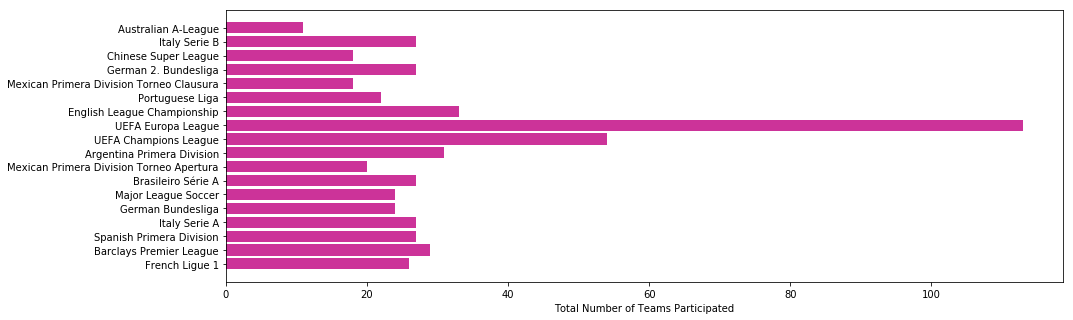

In [6]:
dic = {k:[] for k in matches.league.unique()}
[dic[i[0]].extend([i[1], i[2]]) for i in zip(matches.league, matches.team1, matches.team2)]
dic = {k:len(set(v)) for k,v in dic.items()}

plt.figure(figsize=(15, 5))
y_pos = np.arange(len(dic.keys()))
plt.barh(y_pos, list(dic.values()), color = "#cc3399")
plt.yticks(y_pos, list(dic.keys()))
plt.xlabel("Total Number of Teams Participated")
plt.show()

It is also interesting to see how many matches are played per league.

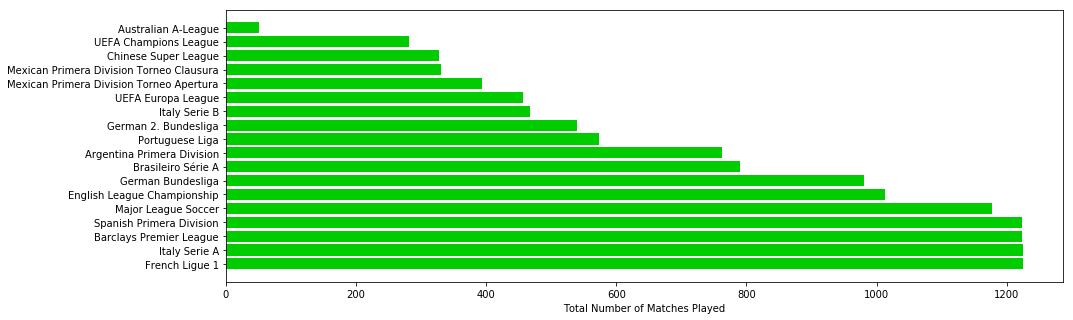

In [7]:
dic = matches.league.value_counts().to_dict()

plt.figure(figsize=(15, 5))
y_pos = np.arange(len(dic.keys()))
plt.barh(y_pos, list(dic.values()), color = "#00cc00")
plt.yticks(y_pos, list(dic.keys()))
plt.xlabel("Total Number of Matches Played")
plt.show()

In [8]:
test1 = matches[["team1", "score1"]].groupby(["team1"], as_index=False).sum().rename(columns={'team1': 'team', 'score1': 'score'})
test2 = matches[["team2", "score2"]].groupby(["team2"], as_index=False).sum().rename(columns={'team2': 'team', 'score2': 'score'})
a = pd.concat([test1,test2])
a = a.groupby("team")["score"].sum().reset_index().sort_values(by = "score", ascending=False)
a.head()

,team,score
233,Manchester City,363.0
276,Paris Saint-Germain,358.0
44,Barcelona,358.0
218,Liverpool,344.0
49,Bayern Munich,343.0


### Using plotly

In [9]:
# Lets assess each teams performance by plotting highest goals scored

fig = go.Figure([go.Bar(x= a.team.to_list()[:20], y = a.score.to_list()[:20])])
fig.update_layout(
    title="Top 20 teams with highest goals scored",
    yaxis_title="Goals Scored"
)

fig.show()

### Much better (visually) isn't it?

Plotly has a lot of internal functions which embellish the plots - and yes it looks great!

### Using NX + matplotlib

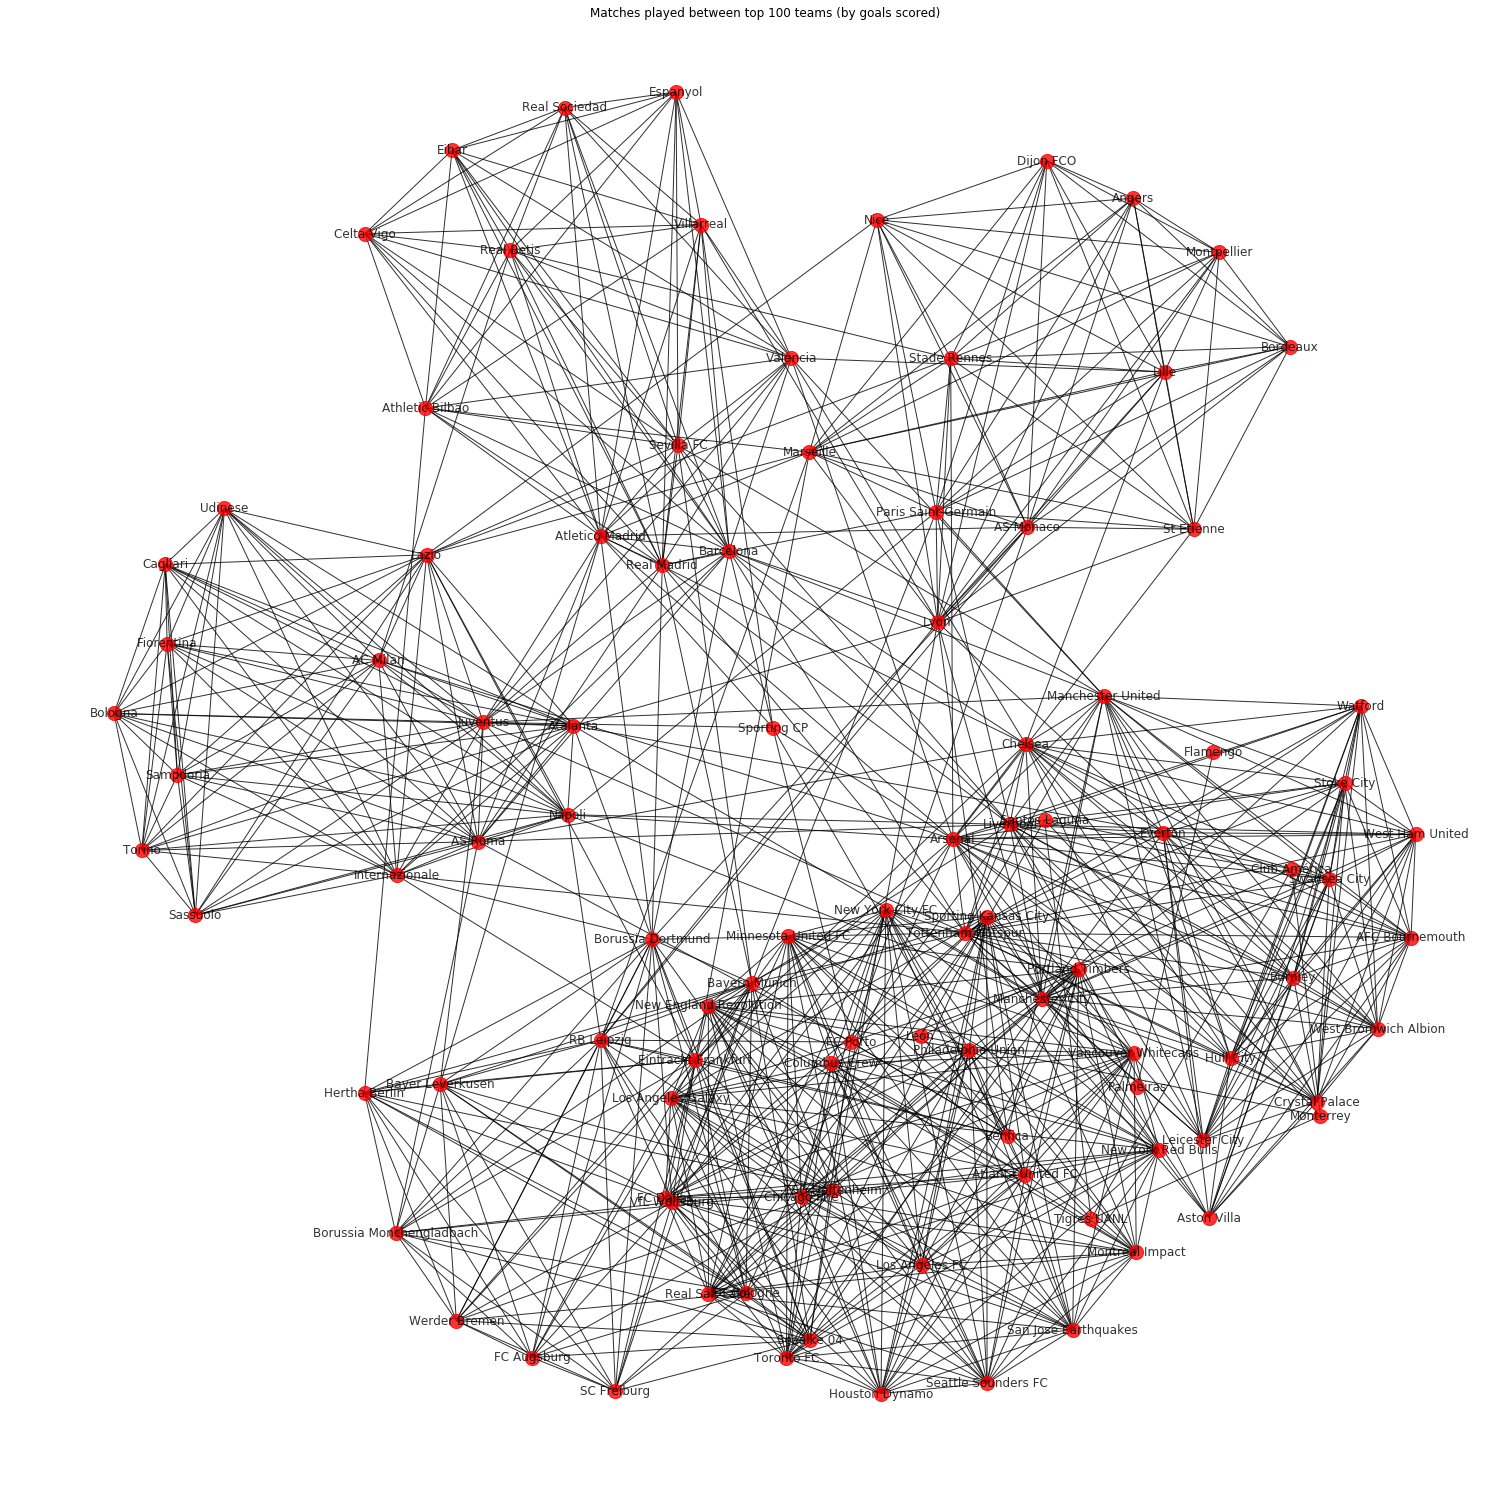

In [11]:
# Graph Ref: https://www.kaggle.com/pavanraj159/european-football-data-analysis/notebook
conn = matches[["team1","team2"]]
conn = conn[(conn["team1"].isin(a["team"][:100])) & (conn["team2"].isin(a["team"][:100]))]
G = nx.from_pandas_edgelist(conn, "team1", "team2")
fig = plt.figure(figsize=(20,20));
nx.draw_kamada_kawai(G,with_labels =True,node_size =200,alpha=.8);
plt.title("Matches played between top 100 teams (by goals scored)");

### Feature engineering

Let's do some feature engineering and we'll use sns this time to plot. We'll extract the match result - i.e. if the match is won, lost or drawn (for home and away matches).

In [12]:
def home(data):
    return "W" if data["score1"] > data["score2"] else "L" if data["score2"] > data["score1"] else "D"

def away(data):
    return "W" if data["score1"] < data["score2"] else "L" if data["score2"] < data["score1"] else "D"

matches['home_outcome'] = matches.apply(lambda row: home(row), axis=1)
matches['away_outcome'] = matches.apply(lambda row: away(row), axis=1)

In [13]:
matches.tail()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,home_outcome,away_outcome
27120,2019-11-13,2105,Brasileiro Série A,Flamengo,Vasco da Gama,73.70,50.52,0.7759,0.0638,0.1603,...,4.0,4.0,2.28,2.29,1.37,1.06,4.20,4.20,D,D
27121,2019-11-15,1948,Australian A-League,Central Coast Mariners,Adelaide United,16.31,29.50,0.2657,0.4943,0.2400,...,1.0,3.0,1.76,3.10,1.08,2.34,1.05,3.15,L,W
27122,2019-11-16,1948,Australian A-League,Western United,Newcastle Jets,29.66,28.35,0.4613,0.2883,0.2504,...,0.0,1.0,1.43,1.22,2.32,1.33,0.00,1.05,L,W
27150,2019-11-16,2105,Brasileiro Série A,Santos,São Paulo,63.23,56.22,0.5011,0.2056,0.2933,...,1.0,1.0,1.45,1.29,0.54,2.27,1.05,1.05,D,D
27151,2019-11-16,2105,Brasileiro Série A,Fluminense,Atletico Mineiro,51.87,53.38,0.5337,0.2273,0.2390,...,1.0,1.0,0.96,0.62,1.38,0.85,1.05,1.05,D,D


In [14]:
print(matches['home_outcome'].value_counts())
print(matches['away_outcome'].value_counts())

W    6106
L    3623
D    3315
Name: home_outcome, dtype: int64
L    6106
W    3623
D    3315
Name: away_outcome, dtype: int64


In [15]:
labels = ["Win", "Lose", "Draw"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[6106, 3623, 3315], name="Home Team Results"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[3623, 6106, 3315], name="Away Team Results"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Home and Away team results",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Home', x=0.18, y=0.5, font_size=24, showarrow=False),
                 dict(text='Away', x=0.82, y=0.5, font_size=24, showarrow=False)])
fig.show()

#### It can be seen from the results that home team is likely to win more than away team.